# Practico 1

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv("GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv")
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [3]:
data.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [4]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [5]:
data["year"] = data.dt.str.split("-").str[0].astype(int)
data["month"] = data.dt.str.split("-").str[1].astype(int)
data["day"] = data.dt.str.split("-").str[2].astype(int)
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,day
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,1
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,3,1
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,4,1
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,5,1
...,...,...,...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E,2013,5,1
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E,2013,6,1
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E,2013,7,1
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E,2013,8,1


In [6]:
data.year.min(), data.year.max()

(np.int64(1743), np.int64(2013))

<Axes: ylabel='year'>

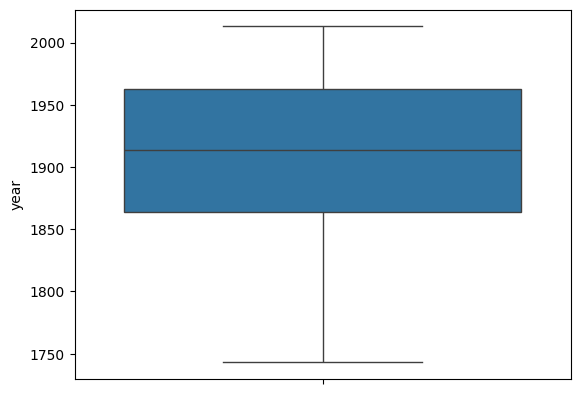

In [7]:
sns.boxplot(data, y="year")

In [8]:
data.City.unique()

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

In [9]:
santiago = data[data.City == "Santiago"]
santiago

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,day
198861,1855-05-01,2.379,1.432,Santiago,Chile,32.95S,69.89W,1855,5,1
198862,1855-06-01,-1.743,2.225,Santiago,Chile,32.95S,69.89W,1855,6,1
198863,1855-07-01,-1.833,1.592,Santiago,Chile,32.95S,69.89W,1855,7,1
198864,1855-08-01,0.072,1.391,Santiago,Chile,32.95S,69.89W,1855,8,1
198865,1855-09-01,1.771,1.326,Santiago,Chile,32.95S,69.89W,1855,9,1
...,...,...,...,...,...,...,...,...,...,...
200757,2013-05-01,3.297,0.365,Santiago,Chile,32.95S,69.89W,2013,5,1
200758,2013-06-01,0.886,0.599,Santiago,Chile,32.95S,69.89W,2013,6,1
200759,2013-07-01,-0.521,0.600,Santiago,Chile,32.95S,69.89W,2013,7,1
200760,2013-08-01,0.839,0.390,Santiago,Chile,32.95S,69.89W,2013,8,1


<Axes: xlabel='year', ylabel='AverageTemperature'>

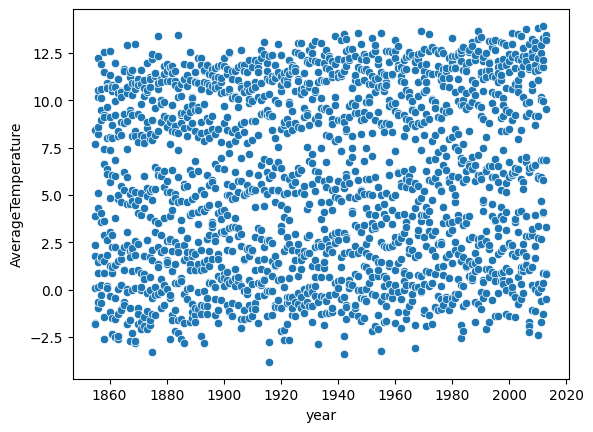

In [ ]:
sns.scatterplot(santiago, x="year", y="AverageTemperature")

In [12]:
jan = santiago[santiago.month == 1]
jan

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,day
198869,1856-01-01,12.208,1.373,Santiago,Chile,32.95S,69.89W,1856,1,1
198881,1857-01-01,11.917,1.706,Santiago,Chile,32.95S,69.89W,1857,1,1
198893,1858-01-01,12.516,2.762,Santiago,Chile,32.95S,69.89W,1858,1,1
198905,1859-01-01,10.919,1.689,Santiago,Chile,32.95S,69.89W,1859,1,1
198917,1860-01-01,12.581,1.477,Santiago,Chile,32.95S,69.89W,1860,1,1
...,...,...,...,...,...,...,...,...,...,...
200705,2009-01-01,13.046,0.297,Santiago,Chile,32.95S,69.89W,2009,1,1
200717,2010-01-01,13.788,0.522,Santiago,Chile,32.95S,69.89W,2010,1,1
200729,2011-01-01,12.912,0.336,Santiago,Chile,32.95S,69.89W,2011,1,1
200741,2012-01-01,13.918,0.380,Santiago,Chile,32.95S,69.89W,2012,1,1


<Axes: xlabel='year', ylabel='AverageTemperature'>

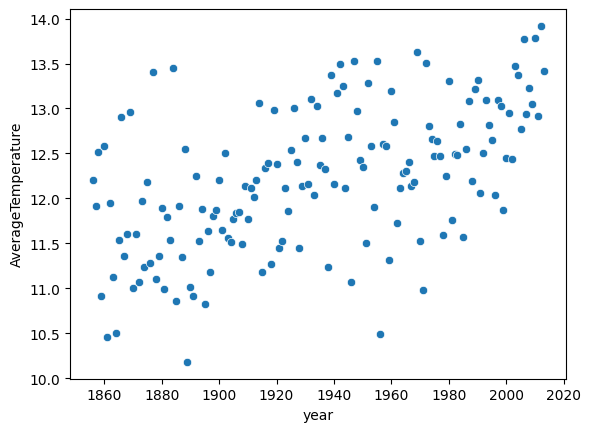

In [13]:
sns.scatterplot(jan, x="year", y="AverageTemperature")

<Axes: title={'center': 'Month: 1'}, xlabel='year', ylabel='AverageTemperature'>

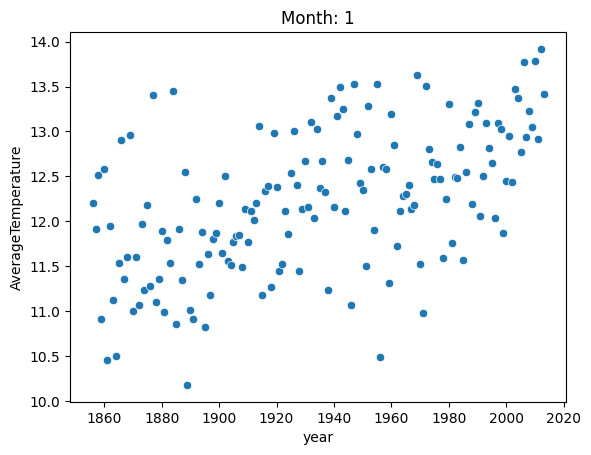

In [19]:
month_index = 1
month = santiago[santiago.month == month_index]
plt.title(f"Month: {month_index}")
sns.scatterplot(month, x="year", y="AverageTemperature")

In [20]:
month

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,day
198869,1856-01-01,12.208,1.373,Santiago,Chile,32.95S,69.89W,1856,1,1
198881,1857-01-01,11.917,1.706,Santiago,Chile,32.95S,69.89W,1857,1,1
198893,1858-01-01,12.516,2.762,Santiago,Chile,32.95S,69.89W,1858,1,1
198905,1859-01-01,10.919,1.689,Santiago,Chile,32.95S,69.89W,1859,1,1
198917,1860-01-01,12.581,1.477,Santiago,Chile,32.95S,69.89W,1860,1,1
...,...,...,...,...,...,...,...,...,...,...
200705,2009-01-01,13.046,0.297,Santiago,Chile,32.95S,69.89W,2009,1,1
200717,2010-01-01,13.788,0.522,Santiago,Chile,32.95S,69.89W,2010,1,1
200729,2011-01-01,12.912,0.336,Santiago,Chile,32.95S,69.89W,2011,1,1
200741,2012-01-01,13.918,0.380,Santiago,Chile,32.95S,69.89W,2012,1,1


In [21]:
# Creando Matriz de Diseño
X = month[["year"]].values
y = month[["AverageTemperature"]].values
y.shape, X.shape

((158, 1), (158, 1))

In [24]:
# Matriz de Diseño 
phi = np.append(np.ones(X.shape), X, axis=1)
phi.shape

(158, 2)

In [25]:
phi.T.shape

(2, 158)

In [26]:
np.linalg.inv()

TypeError: inv() missing 1 required positional argument: 'a'

In [27]:
pseudo_inverse = np.linalg.inv (phi.T @ phi)@ phi.T


In [28]:
w = pseudo_inverse @y
w

array([[-6.03167226],
       [ 0.00943556]])

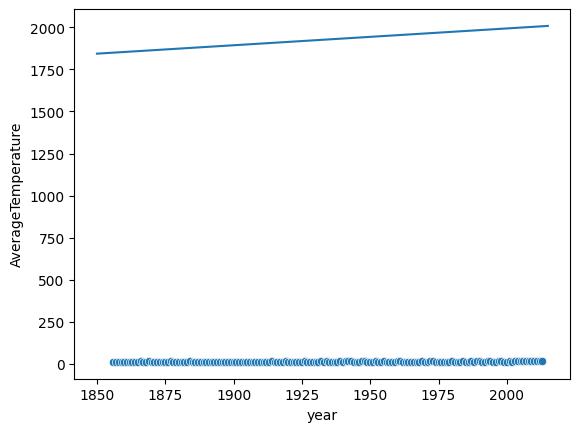

In [33]:
x_line = np.linspace(1850,2015,100).reshape(-1,1)
y_pred = w[0][0] + [1][0]*x_line
sns.scatterplot(month, x="year",y="AverageTemperature")
plt.plot(x_line, y_pred)


C:\Users\diego\AppData\Local\Temp\ipykernel_4112\573594326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month["year"] = ss.fit_transform(month[["year"]])


<Axes: title={'center': 'Month: 1'}, xlabel='year', ylabel='AverageTemperature'>

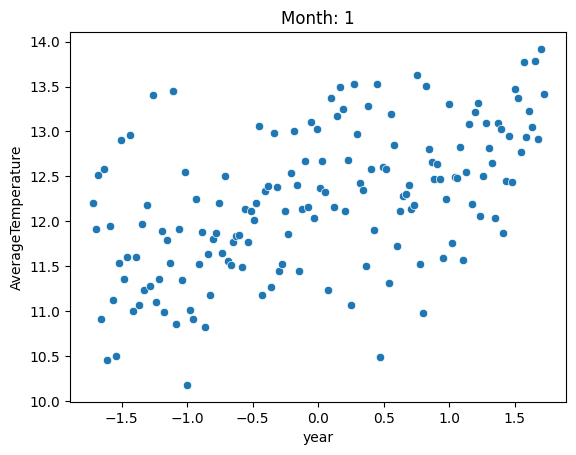

In [36]:
month_index = 1
month = santiago[santiago.month == month_index]
ss = StandardScaler()
month["year"] = ss.fit_transform(month[["year"]])
plt.title(f"Month: {month_index}")
sns.scatterplot(month, x="year", y="AverageTemperature")
